In [83]:
import pandas as pd
import zipfile as zp

dz = zp.ZipFile("/content/1.zip")
data = pd.read_csv(dz.open("loan_approval_dataset.csv"))
data_ = data.copy()

data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [73]:
data.shape

(4269, 13)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [75]:
#Number of NULL (NaN, Na) values

data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


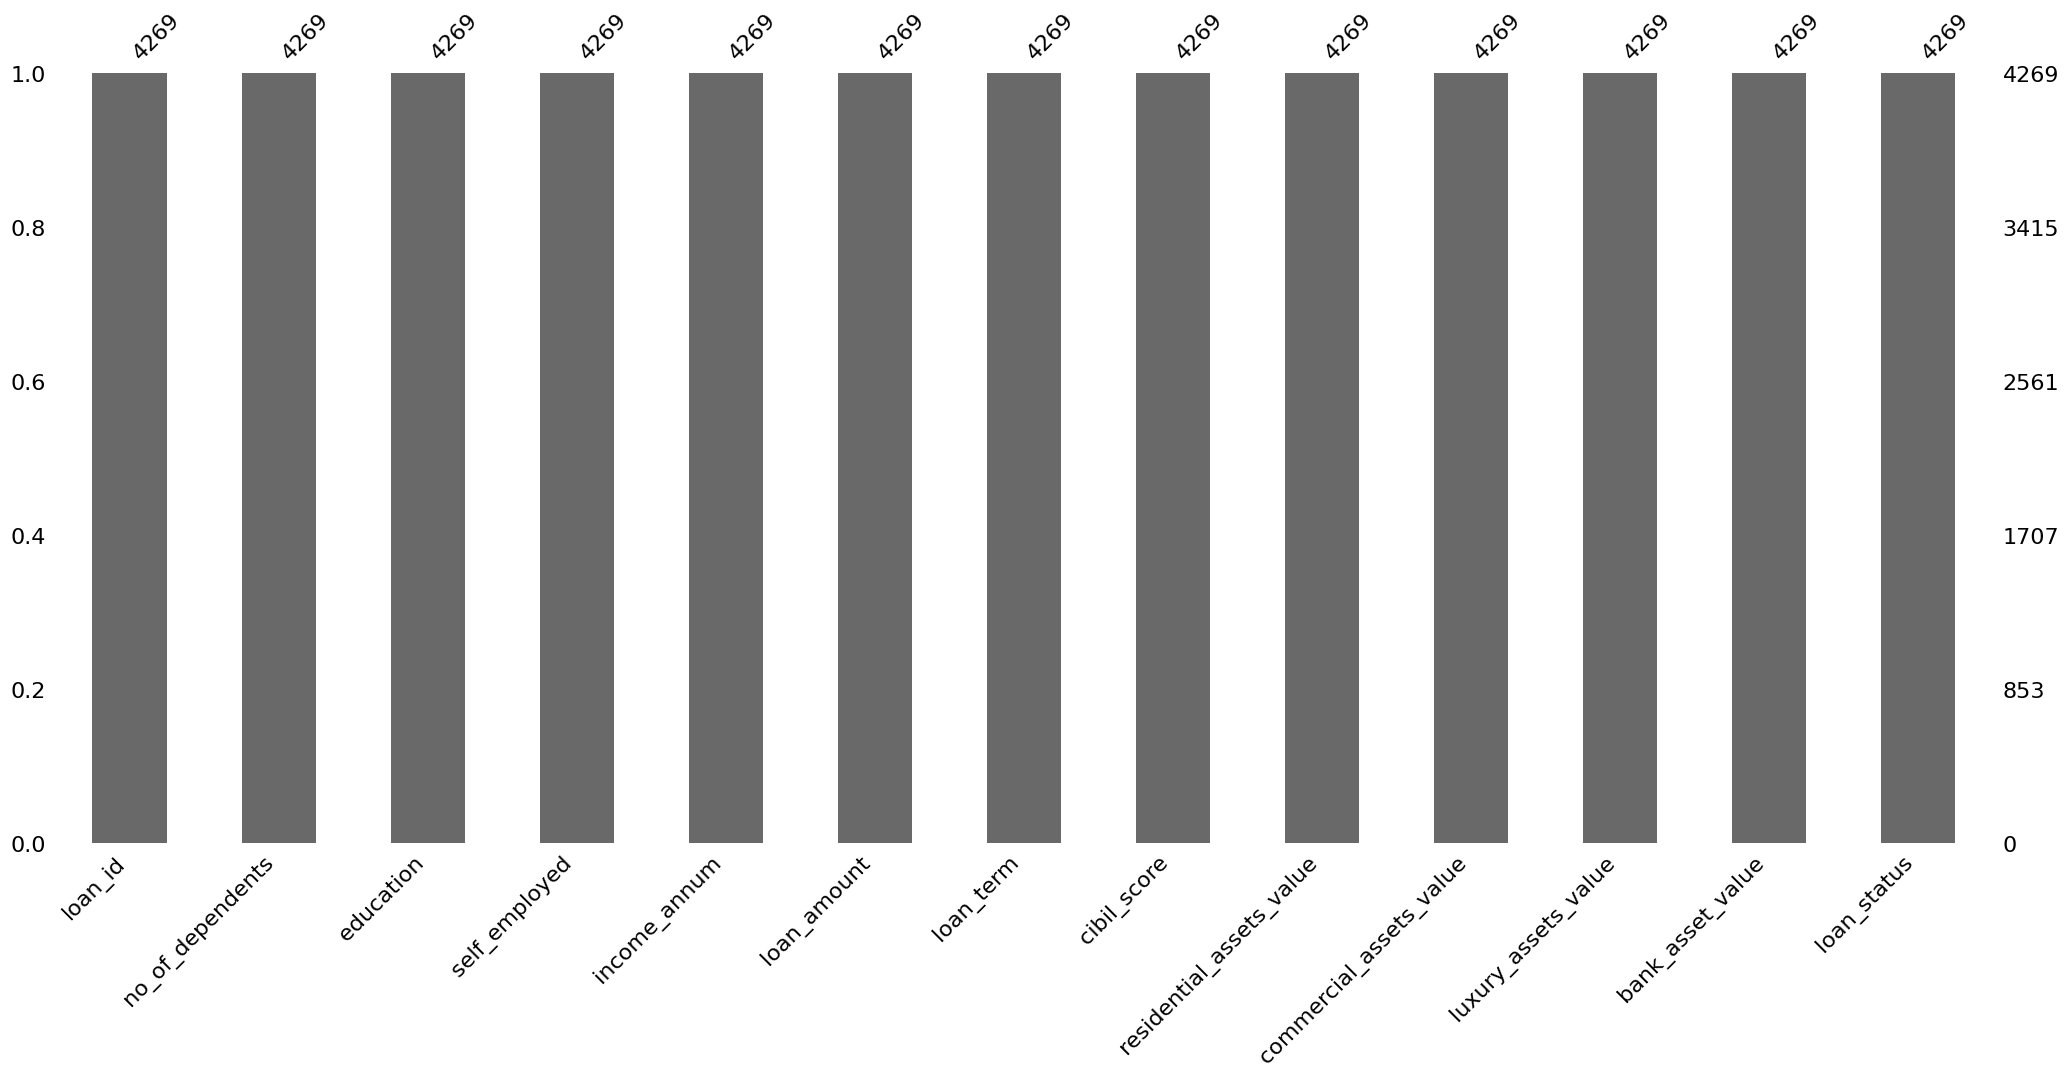

In [76]:
#Visualize NULL values
import missingno as ms
import matplotlib.pyplot as plt

ms.bar(data)
plt.show()

In [77]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

<ipython-input-78-d65e04ac85b1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = " loan_status",\
<ipython-input-78-d65e04ac85b1>:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.countplot(data = data, x = " loan_status",\


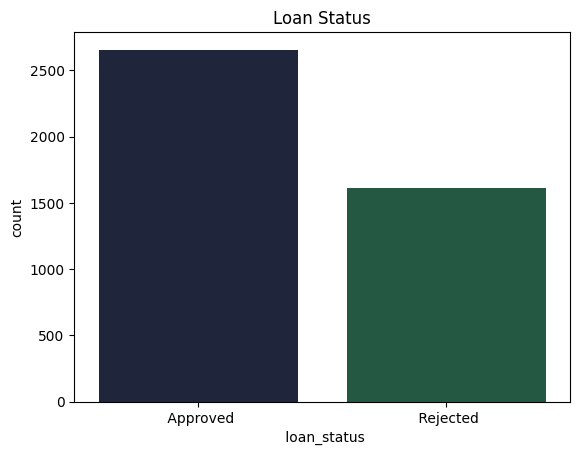

In [78]:
#Analyze "Loan Status" column

import seaborn as sns

sns.countplot(data = data, x = " loan_status",\
              palette = sns.color_palette("cubehelix"))
plt.title("Loan Status")
plt.show()

In [84]:
data[" loan_status"] = [1 if data[" loan_status"][i] == " Approved" else 0 for i in range(len(data))]

In [87]:
print(data[" self_employed"].unique())
print(" ----------------------------------")
print(data[" education"].unique())

[' No' ' Yes']
 ----------------------------------
[' Graduate' ' Not Graduate']


In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in [" education", " self_employed"]:
  data[i] = le.fit_transform(data[i])

In [95]:
data.drop("loan_id", axis = 1, inplace = True)

In [96]:
y = data[" loan_status"]
x = data.drop(" loan_status", axis = 1)

In [97]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [98]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [109]:
#We use lazypredict library for finding the best choice

from lazypredict.Supervised import LazyClassifier

lc = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lc.fit(x_train, x_test, y_train.values.ravel(), y_test.values.ravel())
print(model, ": ", predictions)

  0%|          | 0/31 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
 97%|█████████▋| 30/31 [00:05<00:00,  5.82it/s]

[LightGBM] [Info] Number of positive: 2133, number of negative: 1282
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1455
[LightGBM] [Info] Number of data points in the train set: 3415, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.624597 -> initscore=0.509108
[LightGBM] [Info] Start training from score 0.509108
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 31/31 [00:05<00:00,  5.51it/s]

<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f591c3b8b20> :                                 Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.99               0.99     0.99      0.99   
LGBMClassifier                     0.98               0.98     0.98      0.98   
RandomForestClassifier             0.98               0.98     0.98      0.98   
BaggingClassifier                  0.98               0.98     0.98      0.98   
DecisionTreeClassifier             0.97               0.97     0.97      0.97   
ExtraTreesClassifier               0.97               0.96     0.96      0.97   
AdaBoostClassifier                 0.97               0.96     0.96      0.97   
QuadraticDiscriminantAnalysis      0.94               0.94     0.94      0.94   
SVC                                0.94               0.94     0.94      0.94   
RidgeClassifier   

In [124]:
#We will use Random Forest

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [125]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

cr = classification_report(y_test, pred)
print(f"Classification report: \n {cr}")

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       331
           1       0.98      0.99      0.99       523

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [126]:
acs = accuracy_score(y_test, pred)
print("Accucary score: ", round((acs * 100), 2), "%")

Accucary score:  98.24 %


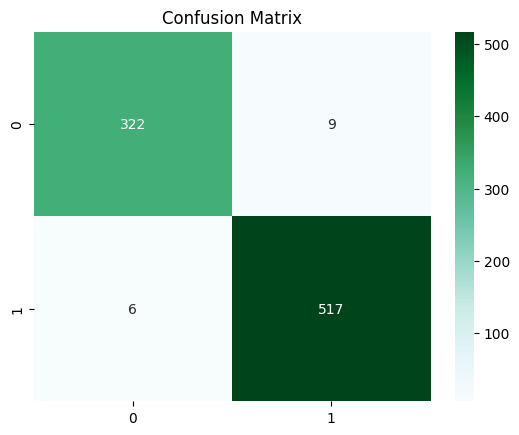

In [127]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot = True, cmap = "BuGn", fmt = "d")
plt.title("Confusion Matrix")
plt.show()

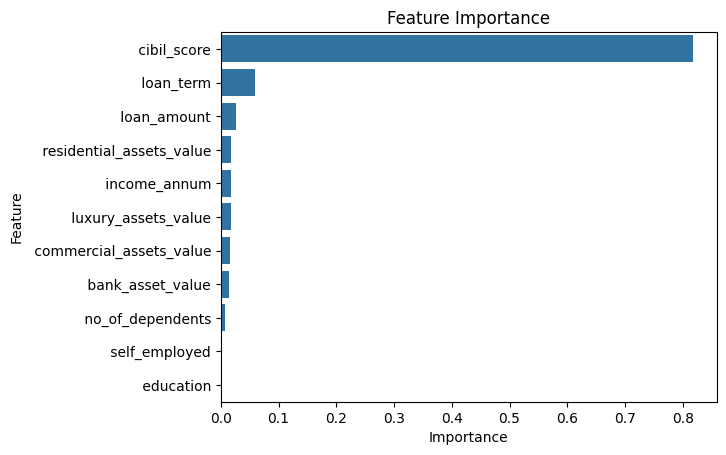

In [128]:
# Feature importance
importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.feature_importances_})
importance.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(data=importance, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()